With a correlation coefficient of 0.84, the correlation between mouse weight and tumor volume is very strong and positive. So tumor volume increases as mouse weight increases.

The Capomulin treatment saw the smallest volume in final tumor volumes. And when studying a particular mouse treated with Capomulin, the tumor volume shrunk tremendously over time. 

Capomulin had the most subjects per treatment. With230 mice, while the smallest sample was Zoniferol with 182 mice. The conclusions made on Capomulin are strong since it has a robust sample size, especially after I removed duplicates. 


## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "/Users/ryan/Desktop/bootcamp/homework/hw5_matplotlib/matplotlib-challenge/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/ryan/Desktop/bootcamp/homework/hw5_matplotlib/matplotlib-challenge/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
combined_df
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = combined_df["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_rows


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_id = pd.DataFrame(duplicate_rows)
all_duplicate_id

,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"].isin(duplicate_rows)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].value_counts()
clean_mice_count = len(clean_mice)
clean_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_mean= clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
summary_median= clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
summary_variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
summary_sd = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
summary_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_statistics_df = pd.DataFrame({"Mean Tumor Volume":summary_mean, "Median Tumor Volume": summary_median, "Tumor Volume Variance": summary_variance, "Tumor Volume Standard Deviation": summary_sd, "Tumor Volume SEM": summary_sem })
summary_statistics_df = summary_statistics_df[["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Standard Deviation", "Tumor Volume SEM"]]
summary_statistics_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
sing_groupby = clean_df.groupby("Drug Regimen")
sing_summary_statistics = sing_groupby.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
sing_summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

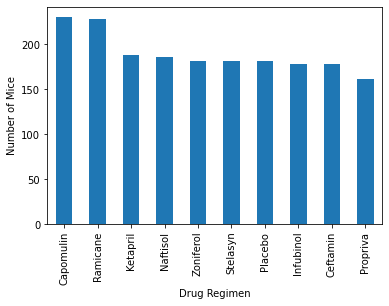

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_per_regimen = combined_df.groupby(["Drug Regimen"]).count()["Timepoint"].sort_values(ascending=[False])

timepoints_per_regimen_chart = timepoints_per_regimen.plot(kind="bar")
plt.ylabel("Number of Mice")
plt.show()

In [10]:
mice_regimen = combined_df.groupby(["Drug Regimen"])["Timepoint"].count().tolist()
mice_regimen

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

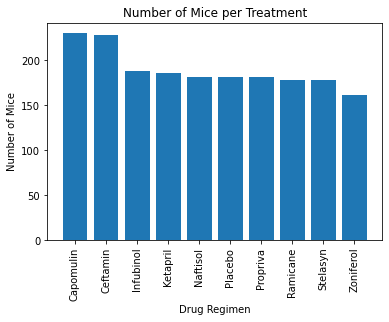

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#mice_regimen = combined_df.groupby(["Drug Regimen"]).count()["Timepoint"].sort_values(ascending=[False])
mice_regimen = combined_df.groupby(["Drug Regimen"])["Timepoint"].count().tolist()
x_axis = np.arange(len(timepoints_per_regimen))

plt.bar(x_axis, timepoints_per_regimen)
tick_loc = [value for value in x_axis]
plt.xticks(tick_loc, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()


/Users/ryan/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


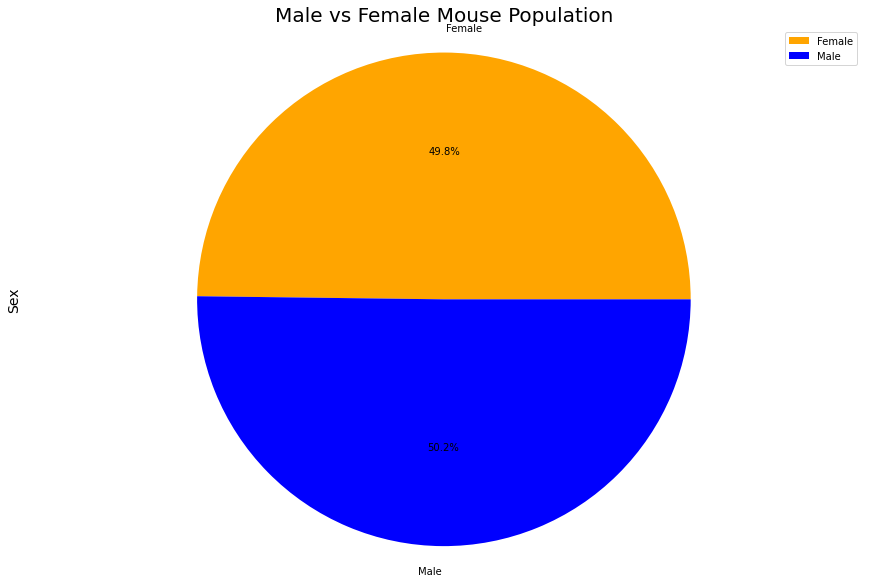

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#  Group by gender and get the number to plot
groupby_gender = combined_df.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

# gender_df

colors = ['orange', 'blue']

plot = mouse_gender.plot.pie(y='Total Count',figsize=(15,10), colors = colors,  autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal",fontsize = 14)
plt.show()


/Users/ryan/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


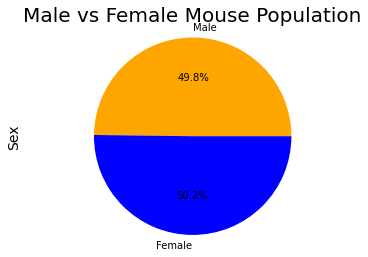

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#  Group by gender and get the number to plot
groupby_gender = combined_df.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender_dist = mouse_gender["Percentage of Sex"]

colors = ['orange', 'blue']
plot2 = plt.pie(mouse_gender_dist, labels=['Male', 'Female'], colors=colors, autopct="%1.1f%%")





plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)
plt.axis("equal",fontsize = 14)
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
top_regimen = combined_df[combined_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]


top_regimen = top_regimen.sort_values(["Timepoint"], ascending=True)
top_regimen = top_regimen[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
top_regimen


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
final_v_df = combined_df[['Mouse ID','Drug Regimen','Weight (g)','Timepoint','Tumor Volume (mm3)']]

sort_top_regimen = final_v_df.sort_values(["Mouse ID","Timepoint"], ascending=False)


no_duplicate = sort_top_regimen.drop_duplicates(subset="Mouse ID")
no_duplicate

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

,Mouse ID,Drug Regimen,Weight (g),Timepoint,Tumor Volume (mm3)
1892,z969,Naftisol,30,45,73.867845
1882,z795,Naftisol,29,45,65.741070
1872,z581,Infubinol,25,45,62.754451
84,z578,Ramicane,16,45,30.638696
1862,z435,Propriva,26,10,48.710661
...,...,...,...,...,...
500,a366,Stelasyn,29,30,63.440686
493,a275,Ceftamin,28,45,62.999356
483,a262,Placebo,29,45,70.717621
473,a251,Infubinol,25,45,65.525743


In [16]:
# Extract final tumor volumes for each mouse treated by Capomulin regimen:
capomulin_final_vol=no_duplicate[no_duplicate['Drug Regimen'] == 'Capomulin']

capomulin_volume = capomulin_final_vol["Tumor Volume (mm3)"]
capomulin_quartiles = capomulin_volume.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq



# Potential outliers calculation:
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)

print(f"Values below {round(capomulin_lower_bound,2)} could be outliers.")
print(f"Values above {round(capomulin_upper_bound,2)} could be outliers.")

Values below 20.7 could be outliers.
Values above 51.83 could be outliers.


In [17]:
# Extract final tumor volumes for each mouse treated by Capomulin regimen:
ramicane_final_vol=no_duplicate[no_duplicate['Drug Regimen'] == 'Ramicane']
ramicane_final_vol.sort_values(['Mouse ID']).head(10)

ramicane_volume = ramicane_final_vol["Tumor Volume (mm3)"]
ramicane_quartiles = ramicane_volume.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq



# Potential outliers calculation:
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)

print(f"Values below {round(ramicane_lower_bound,2)} could be outliers.")
print(f"Values above {round(ramicane_upper_bound,2)} could be outliers.")

Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


In [18]:
#Extract final tumor volumes for each mouse treated by Capomulin regimen:
infubinol_final_vol=no_duplicate[no_duplicate['Drug Regimen'] == 'Infubinol']
infubinol_final_vol.sort_values(['Mouse ID']).head(10)

infubinol_volume = infubinol_final_vol["Tumor Volume (mm3)"]
infubinol_quartiles = infubinol_volume.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq



# Potential outliers calculation:
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)

print(f"Values below {round(infubinol_lower_bound,2)} could be outliers.")
print(f"Values above {round(infubinol_upper_bound,2)} could be outliers.")

Values below 36.83 could be outliers.
Values above 82.74 could be outliers.


In [19]:
#Extract final tumor volumes for each mouse treated by Capomulin regimen:
ceftamin_final_vol=no_duplicate[no_duplicate['Drug Regimen'] == 'Ceftamin']
ceftamin_final_vol.sort_values(['Mouse ID']).head(10)

ceftamin_volume = ceftamin_final_vol["Tumor Volume (mm3)"]
ceftamin_quartiles = ceftamin_volume.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq



# Potential outliers calculation:
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

print(f"Values below {round(ceftamin_lower_bound,2)} could be outliers.")
print(f"Values above {round(ceftamin_upper_bound,2)} could be outliers.")

Values below 25.36 could be outliers.
Values above 87.67 could be outliers.


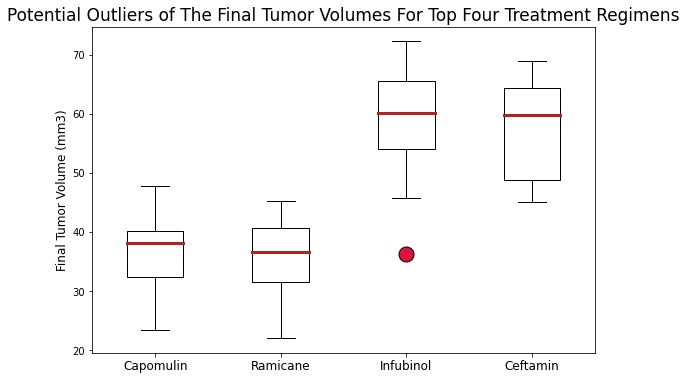

In [20]:
# Final tumor volumes data for 4 top treatments:
capomulin_volume=capomulin_final_vol['Tumor Volume (mm3)']
ramicane_volume=ramicane_final_vol['Tumor Volume (mm3)']
infubinol_volume=infubinol_final_vol['Tumor Volume (mm3)']
ceftamin_volume=ceftamin_final_vol['Tumor Volume (mm3)']

# Combine final tumor volumes data for 4 top treatments into a list: 
final_volumes=[capomulin_volume, ramicane_volume, infubinol_volume, ceftamin_volume]

# Outliers plot of the final tumor volumes:
fig, ax=plt.subplots(1, figsize=(9, 6))
box_plot=ax.boxplot(final_volumes, patch_artist=True)
ax.set_title('Potential Outliers of The Final Tumor Volumes For Top Four Treatment Regimens', fontsize=17)
ax.set_ylabel('Final Tumor Volume (mm3)', fontsize=12, color='black')
ax.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], fontsize=12, color='black')

# Change fill color:
for box in box_plot['boxes']:
    box.set(facecolor='white')

# Change color and linewidth of the medians:
for median in box_plot['medians']:
    median.set(color='firebrick', linewidth=3)

# Change the fill and style of fliers:
for flier in box_plot['fliers']:
    flier.set(marker='o', markersize=15, markerfacecolor='crimson', alpha=1)

plt.show()

## Line and Scatter Plots

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


target_mouse_sorted=sort_top_regimen.loc[sort_top_regimen['Mouse ID']=='l509',:]
target_mouse=target_mouse_sorted.sort_values('Timepoint')
#target_mouse

# Redusing dataframe to columns 'Timepoint' and 'Tumor Volume (mm3)':
target_mouse_plot=target_mouse[['Timepoint','Tumor Volume (mm3)']]
#target_mouse_plot

# Change index to timepoints:
target_mouse_plot=target_mouse_plot.set_index('Timepoint')

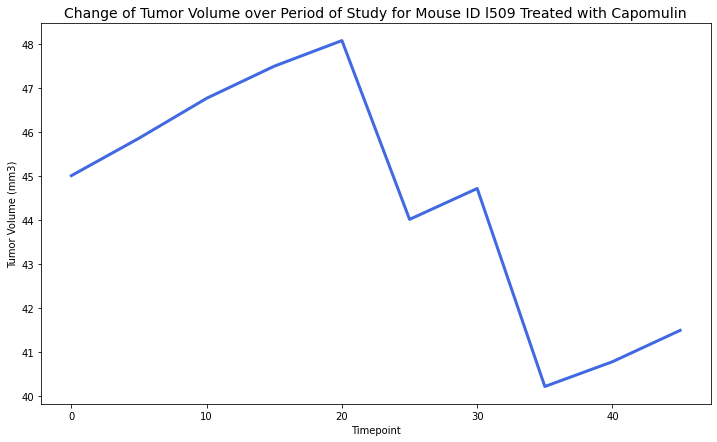

In [22]:
# Plot the chart:
target_mouse_plot.plot(linewidth=3, color='royalblue', figsize=(12, 7))

# Set x-label, y-label, and a title:
plt.title('Change of Tumor Volume over Period of Study for Mouse ID l509 Treated with Capomulin', fontsize=14)
plt.xlabel('Timepoint', fontsize=10, color='black')
plt.ylabel('Tumor Volume (mm3)', fontsize=10, color='black')

plt.legend('',frameon=False)

plt.show()

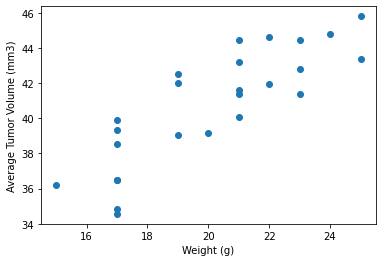

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",:]

cap_avg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


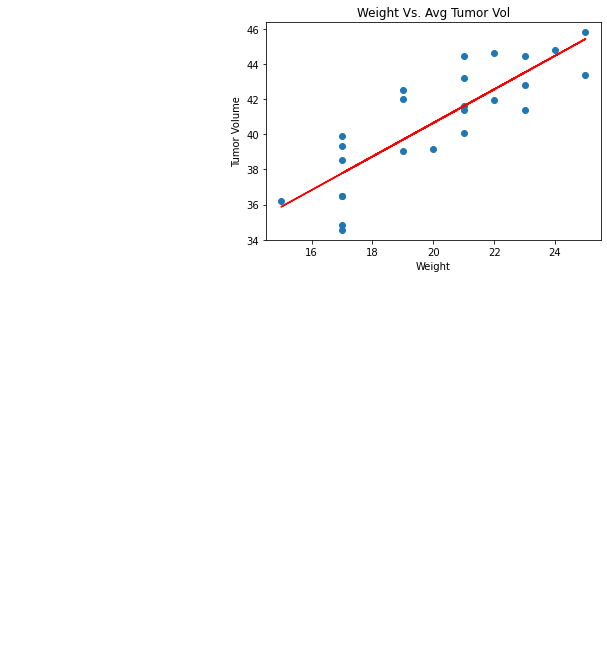

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

model=st.linregress(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])

x_values = cap_avg["Weight (g)"]
y_values = cap_avg["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()



